In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


## Data Upload

In [2]:
df = pd.read_csv("C:/Users/jayita/Desktop/Crop_recommendation.csv")

## Data Exploration

In [3]:
df.shape

(2200, 8)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
pd.DataFrame(df)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

<AxesSubplot:xlabel='count', ylabel='label'>

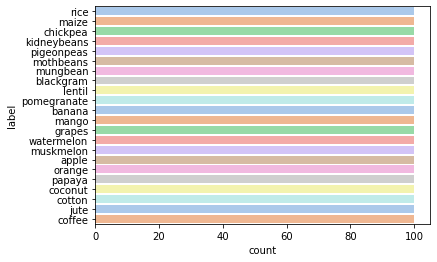

In [8]:
## imbalance check
sns.countplot(y='label',data=df, palette="pastel")

In [9]:
co_relation=df.corr()
co_relation

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

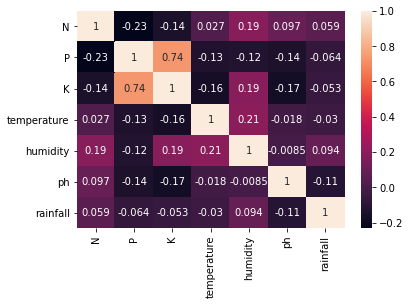

In [10]:
sns.heatmap(co_relation, annot=True)

Text(0.5, 0, 'relative humidity in %')

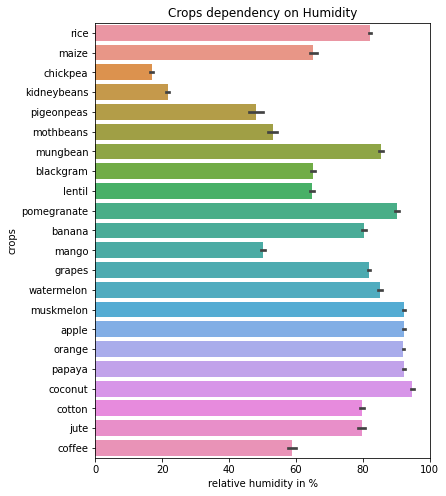

In [13]:
plt.figure(figsize=(6,8))
plt.title("Crops dependency on Humidity") 
sns.barplot(y="label", x="humidity", data=df) 
plt.ylabel("crops")
plt.xlabel("relative humidity in %")

Text(0.5, 1.0, 'ratio of NPK fertilizer content in soil')

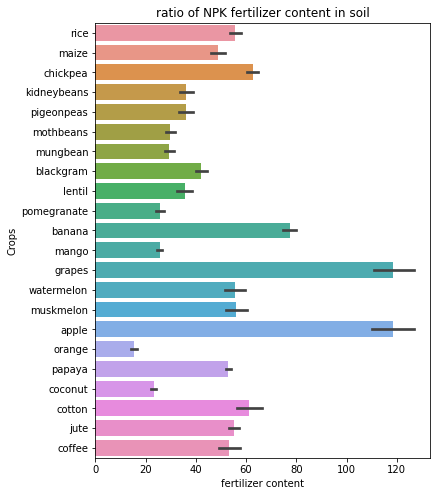

In [11]:
plt.figure(figsize=(6,8))
NPK_data = pd.melt(df, id_vars=["label"], value_vars=["N", "P", "K"],var_name='element', value_name='fertilizer content')
sns.barplot(y="label", x="fertilizer content", data=NPK_data)
plt.ylabel("Crops")
plt.title("ratio of NPK fertilizer content in soil")

Nitrogen, phosphorus and potassium, or NPK, are the “Big 3” primary nutrients in commercial fertilizers. Each of these fundamental nutrients plays a key role in plant nutrition.

Text(0.5, 0, 'rainfall in mm')

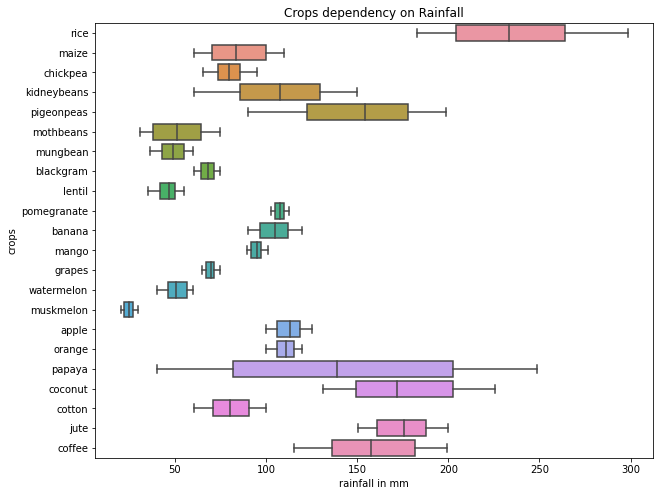

In [14]:
plt.figure(figsize=(10,8)) 
plt.title("Crops dependency on Rainfall") 
sns.boxplot(y="label", x="rainfall", data=df) 
plt.ylabel("crops")
plt.xlabel("rainfall in mm")

We can see for rice the minimum rainfall required is aprox 170mm whereas for grapes the range is 60-70mm.

Text(0, 0.5, 'crops')

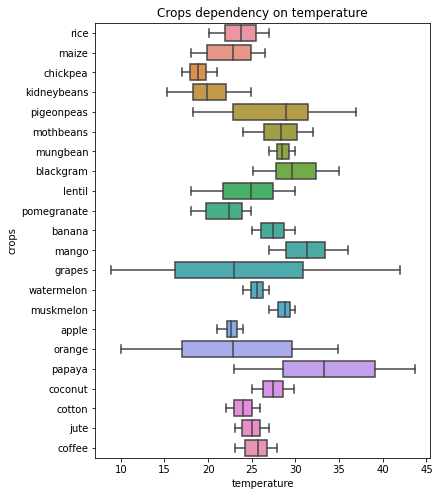

In [12]:
plt.figure(figsize=(6,8))
plt.title("Crops dependency on temperature")
sns.boxplot(y="label", x="temperature", data=df)
plt.ylabel("crops")

Now if we consider the temperature as a parameter, we can see grapes can be caltivated for a wide range of temperature i,e, 10 to 43 degree centigrade temperature. But for most of the crops the required temperature is within 23 to 30 degree centigrade.

Text(0.5, 0, 'ph value of the soil')

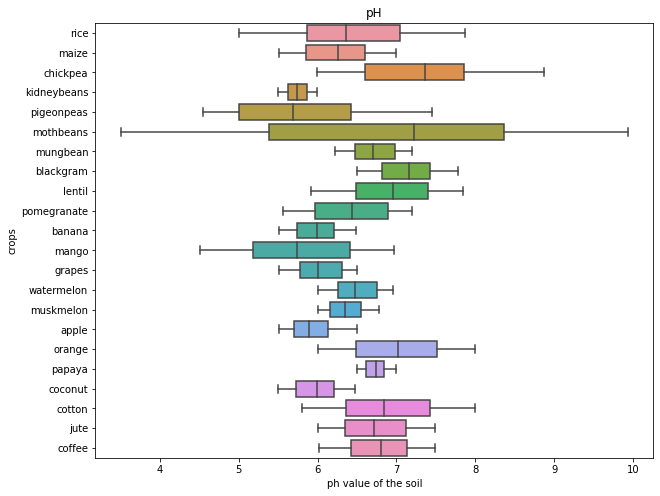

In [15]:
plt.figure(figsize=(10,8))
plt.title("pH")
sns.boxplot(y="label", x="ph", data=df)
plt.ylabel("crops")
plt.xlabel("ph value of the soil")

The study of soil pH is very important in agriculture as that soil pH regulates plant nutrient availability by controlling the chemical forms of the different nutrients and also influences their chemical reactions. As a result, soil and crop productivities are linked to soil pH value. Though soil pH generally ranges from 1 to 14, we can see the optimum range for most  crops is between 5.5 and 7.5. However, some crops have adapted to thrive at soil pH values outside this optimum range like mothbeans.

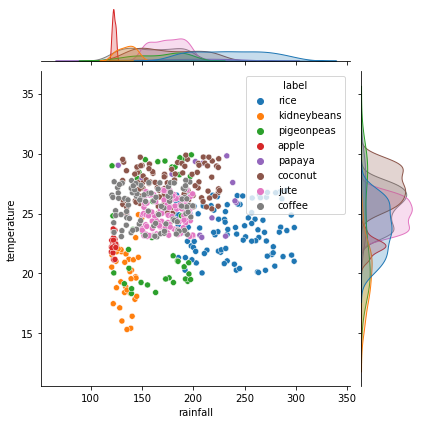

In [29]:
sns.jointplot(x="rainfall",y="temperature",data=df[(df['temperature']<=30) & (df['rainfall']>120)],hue="label")

Rainy Season analyse when average rainfall is greater than 120mm and temperature is within 30 degree. This analyse help us to identify the monsoon crops such as rice,apple, cotton etc.

## Data Preprocessing

In [17]:
X=df[['N','P','K','temperature','humidity','ph','rainfall']]
y=df.label

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
np.shape(X_train)

(1760, 7)

In [20]:
np.shape(y_train)

(1760,)

## Model

### Using Random Forest Classifier

In [21]:
model_rf= RandomForestClassifier(max_features=3,n_estimators=10,random_state=0).fit(X_train, y_train)

print('Random Forest model Accuracy on training data-set: {:.4f}'.format(model_rf.score(X_train, y_train)))
print('Random Forest model Accuracy on test data-set: {:.4f}'.format(model_rf.score(X_test, y_test)))

Random Forest model Accuracy on training data-set: 1.0000
Random Forest model Accuracy on test data-set: 0.9977


### Using Decision Tree Classifier

In [22]:
model_dt= DecisionTreeClassifier(max_depth=15,random_state=0).fit(X_train, y_train)

print('Decision Tree model Accuracy on training data-set: {:.4f}'.format(model_dt.score(X_train, y_train)))
print('Decision Tree model Accuracy on test data-set: {:.4f}'.format(model_dt.score(X_test, y_test)))

Decision Tree model Accuracy on training data-set: 1.0000
Decision Tree model Accuracy on test data-set: 0.9955


### Using Gradient Boosting Classifiers

In [23]:
model_gb = GradientBoostingClassifier(n_estimators=20, max_features=2, random_state=0).fit(X_train, y_train)

print('Gradient Boosting model Accuracy on training data-set: {:.4f}'.format(model_gb.score(X_train, y_train)))
print('Gradient Boosting model Accuracy on test data-set: {:.4f}'.format(model_gb.score(X_test, y_test)))

Gradient Boosting model Accuracy on training data-set: 0.9989
Gradient Boosting model Accuracy on test data-set: 0.9955


### Using KNN Classifier

In [24]:
model_knn= KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

print('KNN classifier Accuracy on training data-set: {:.4f}'.format(model_knn.score(X_train, y_train)))
print('KNN classifier Accuracy on test data-set: {:.4f}'.format(model_knn.score(X_test, y_test)))

KNN classifier Accuracy on training data-set: 0.9920
KNN classifier Accuracy on test data-set: 0.9705


### Using Support Vector Classifer (SVC)

In [25]:
model_svc= SVC(C=100, gamma=0.001).fit(X_train, y_train)

print('Support Vector Classifer (SVC) Accuracy on training data-set: {:.4f}'.format(model_svc.score(X_train, y_train)))
print('Support Vector Classifer (SVC) Accuracy on test data-set: {:.4f}'.format(model_svc.score(X_test, y_test)))

Support Vector Classifer (SVC) Accuracy on training data-set: 0.9989
Support Vector Classifer (SVC) Accuracy on test data-set: 0.9864


# Conclusion

At the end of our modeling step, we built five models: Random Forest Classifier, Decision Tree Classifier, Gradient Boosting Classifiers,  KNN Classifier, Support Vector Classifer (SVC). We noticed that Random Forest model gave us the best result compare to the other four models.

In [31]:
model_rf.predict([[117,32,34,26.27,52.12,6.75,127.17]])

array(['coffee'], dtype=object)